In [1]:
# Подключение необходимых пакетов
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

    Updating registry at `C:\Users\kotof\.julia\registries\General.toml`
   Resolving package versions...
   Installed StatsFuns ─────────────────────────── v1.3.2
   Installed OrdinaryDiffEqRKN ─────────────────── v1.1.0
   Installed OrdinaryDiffEqRosenbrock ──────────── v1.2.0
   Installed HypergeometricFunctions ───────────── v0.3.24
   Installed Accessors ─────────────────────────── v0.1.38
   Installed DifferentialEquations ─────────────── v7.14.0
   Installed MutableArithmetics ────────────────── v1.5.2
   Installed OrdinaryDiffEqStabilizedRK ────────── v1.1.0
   Installed OffsetArrays ──────────────────────── v1.14.1
   Installed DomainSets ────────────────────────── v0.7.14
   Installed NonlinearSolve ────────────────────── v3.15.1
   Installed OrdinaryDiffEqSDIRK ───────────────── v1.1.0
   Installed TimerOutputs ──────────────────────── v0.5.25
   Installed Polyester ─────────────────────────── v0.7.16
   Installed PDMats ────────────────────────────── v0.11.31
   Installed O

In [2]:

using DifferentialEquations
using Plots

In [3]:
# Задание параметров
N = 7777  # Общее количество особей в популяции
I = 700   # Начальное количество инфицированных особей
R = 0     # Начальное количество выздоровевших особей
S = N - I - R  # Начальное количество здоровых, восприимчивых к инфекции особей
a = 0.007  # Коэффициент заболевания
b = 0.003  # Коэффициент выздоровления
crit_I = 90  # Критическое значение инфицированных

90

In [4]:
# Определение первой фазы, где происходит только выздоровление
function first_case!(du, u, p, t)
    _, b = p
    du[1] = 0  # Количество восприимчивых особей остается неизменным
    du[2] = -u[2] * b  # Количество инфицированных уменьшается за счет выздоровления
    du[3] = u[2] * b   # Количество выздоровевших увеличивается
end

first_case! (generic function with 1 method)

In [5]:
# Определение второй фазы, где происходят как заражения, так и выздоровления
function second_case!(du, u, p, t)
    a, b = p
    du[1] = -a * u[1]              # Количество восприимчивых особей уменьшается за счет заражений
    du[2] = a * u[1] - u[2] * b     # Количество инфицированных изменяется из-за заражений и выздоровлений
    du[3] = u[2] * b               # Количество выздоровевших увеличивается
end

second_case! (generic function with 1 method)

In [6]:

# Определение комбинированной фазы с учетом критического порога
function combo_case!(du, u, p, t)
    a, b, crit_I = p
    if u[2] > crit_I
        du[1] = -a * u[1]          # Количество восприимчивых особей уменьшается за счет заражений
        du[2] = a * u[1] - u[2] * b # Количество инфицированных изменяется из-за заражений и выздоровлений
        du[3] = u[2] * b           # Количество выздоровевших увеличивается
    else
        du[1] = 0                  # Количество восприимчивых особей остается неизменным
        du[2] = -u[2] * b          # Количество инфицированных уменьшается только за счет выздоровлений
        du[3] = u[2] * b           # Количество выздоровевших увеличивается
    end
end

combo_case! (generic function with 1 method)

In [7]:
# Начальные условия
u0 = [S, I, R]
tspan = (0.0, 2500.0)

(0.0, 2500.0)

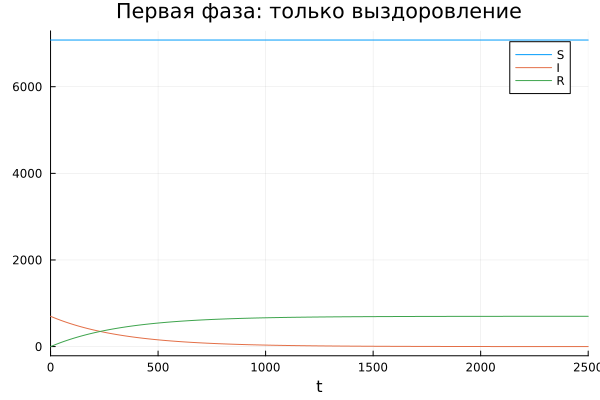

In [8]:
# Первая фаза
p_first = (0.0, b)
prob_first = ODEProblem(first_case!, u0, tspan, p_first)
sol_first = solve(prob_first)
plot(sol_first, title="Первая фаза: только выздоровление", label=["S" "I" "R"])

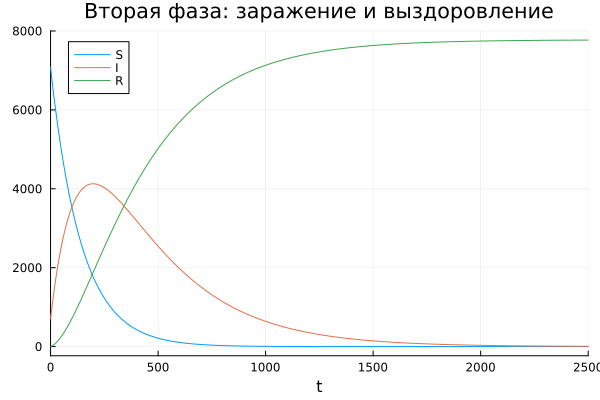

In [9]:
# Вторая фаза
p_second = (a, b)
prob_second = ODEProblem(second_case!, u0, tspan, p_second)
sol_second = solve(prob_second)
plot(sol_second, title="Вторая фаза: заражение и выздоровление", label=["S" "I" "R"])

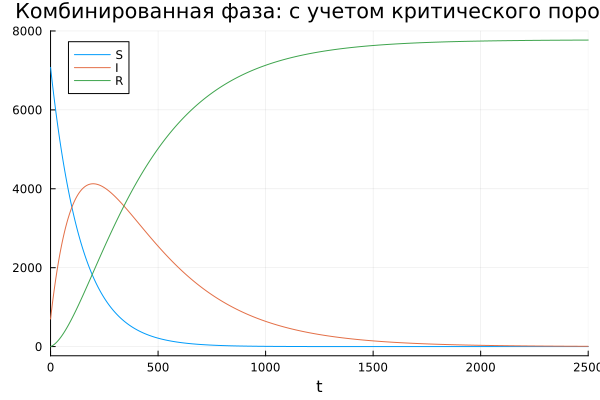

In [10]:
# Комбинированная фаза
p_combo = (a, b, crit_I)
prob_combo = ODEProblem(combo_case!, u0, tspan, p_combo)
sol_combo = solve(prob_combo)
plot(sol_combo, title="Комбинированная фаза: с учетом критического порога", label=["S" "I" "R"])